In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import ttest_ind
from tabulate import tabulate
import random
import subprocess
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


colors_v1 = ['#1F77B4', '#FF7F0E', '#D62728', '#2CA02C', '#535154', 'black', '#F6C85F']
colors_v2 = ['#1064A0', '#9E172A', '#FB8C0A', '#117733', '#785F51', '#909392', '#F6C85F']

colors = colors_v1

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_2325821/630898095.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [42]:
accuracies = pd.read_csv("/media/SSD/paper_data/sakura/accuracies/accuracies_dataset_size_all.csv")

In [43]:
datasets = list(accuracies.dataset.unique())
dataset_labels = [element.replace("nops", "N").replace("random", "R").replace("in", "IN").replace("out", "OUT") for element in datasets]

In [44]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(accuracies)

             dataset   size   model preprocessing  seed  accuracy
0        Exp-in-nops   1000  resnet          none     0    79.405
1        Exp-in-nops   2000  resnet          none     0    81.905
2        Exp-in-nops   3000  resnet          none     0    83.234
3        Exp-in-nops   4000  resnet          none     0    84.750
4        Exp-in-nops   5000  resnet          none     0    84.989
5        Exp-in-nops   6000  resnet          none     0    84.959
6        Exp-in-nops   7000  resnet          none     0    86.143
7        Exp-in-nops   8000  resnet          none     0    86.382
8        Exp-in-nops   9000  resnet          none     0    86.372
9        Exp-in-nops  10000  resnet          none     0    86.338
10       Exp-in-nops  10000  resnet          none     1    86.665
11       Exp-in-nops  10000  resnet          none     2    86.519
12       Exp-in-nops  10000  resnet          none     3    86.297
13       Exp-in-nops  10000  resnet          none     4    86.416
14     Exp

<Figure size 432x288 with 0 Axes>

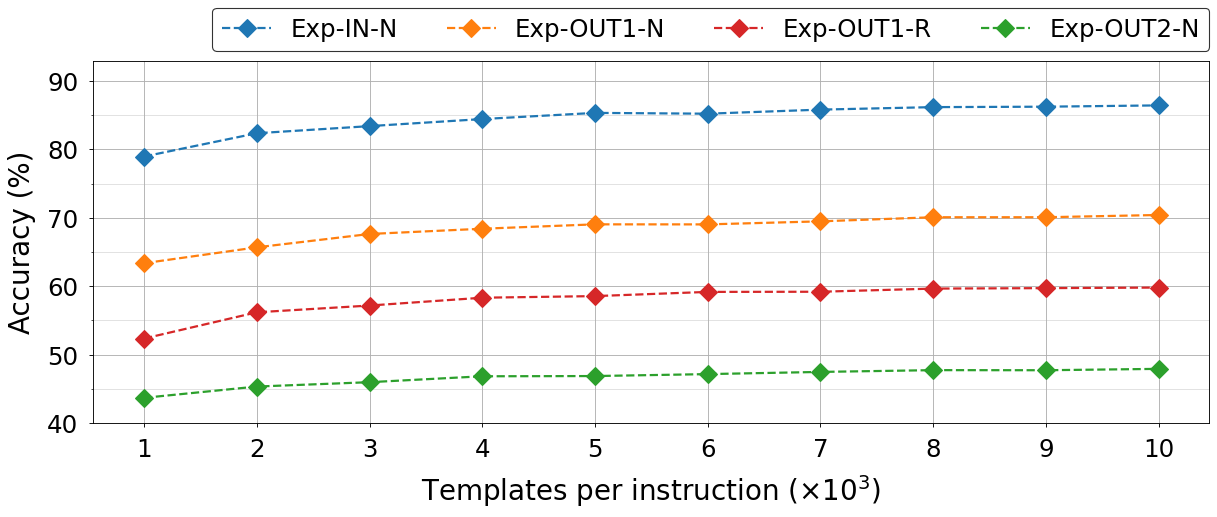

In [127]:
plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

plt.ylabel('Accuracy (%)', fontsize=25, labelpad=10)
plt.xlabel('Templates per instruction ('+r'$\times 10^3$'+')', fontsize=25, labelpad=10)
plt.grid(visible=True, which='major')

minor_ticks = np.arange(45, 91, 10)
major_ticks = np.arange(40, 91, 10)

for dataset_id, dataset in enumerate(datasets):
    accuracy_curve = np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].groupby('size').mean()['accuracy'])
    ax.plot(range(1, 11), 
            accuracy_curve, 
            color=colors[dataset_id], 
            linewidth='2',
            marker="D",
            markersize=12,
            linestyle='dashed',
            label=dataset_labels[dataset_id])

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_ylim([40, 93])

ax.set_xticks(range(1, 11), range(1, 11, 1));

ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=1)

#plt.legend(loc='upper right', fontsize=18, ncol=7,edgecolor='black',bbox_to_anchor=(1.01, 1.14))
plt.legend(loc='upper right', fontsize=22, ncol=4,edgecolor='black',bbox_to_anchor=(1.011, 1.18))

file_path = "/media/SSD/paper_data/plots/fig-dataset-size.pdf"
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

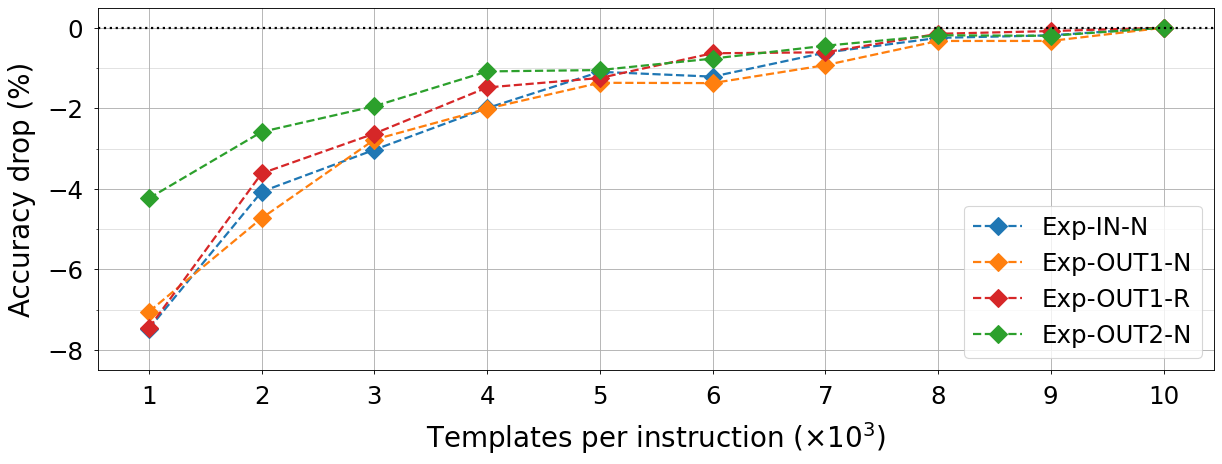

In [128]:
plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

#plt.title("acc(x)-acc(10k)")
plt.ylabel('Accuracy drop (%)', fontsize=25, labelpad=10)
plt.xlabel('Templates per instruction ('+r'$\times 10^3$'+')', fontsize=25, labelpad=10)
plt.grid(visible=True, which='major')

minor_ticks = np.arange(-7, 1, 2)
major_ticks = np.arange(-8, 1, 2)

for dataset_id, dataset in enumerate(datasets):
    accuracy_curve = np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)].groupby('size').mean()['accuracy'])
    ax.plot(range(1, 11),
            accuracy_curve-accuracy_curve.max(),
            #accuracy_curve/accuracy_curve.max(), 
            color=colors[dataset_id], 
            linewidth='2',
            marker="D",
            markersize=12,
            linestyle='dashed',
            label=dataset_labels[dataset_id])
    
ax.axhline(0, color='black', linestyle='dotted', linewidth='2')

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_ylim([-8.5, 0.5])

ax.set_xticks(range(1, 11), range(1, 11, 1));

ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=1)

plt.legend()

file_path = "/media/SSD/paper_data/plots/fig-dataset-size-normalized.pdf"
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')